Collecting Data

In [1]:
#Collecting Data
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Dataset
data = pd.read_csv('artho.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


EDA

In [3]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


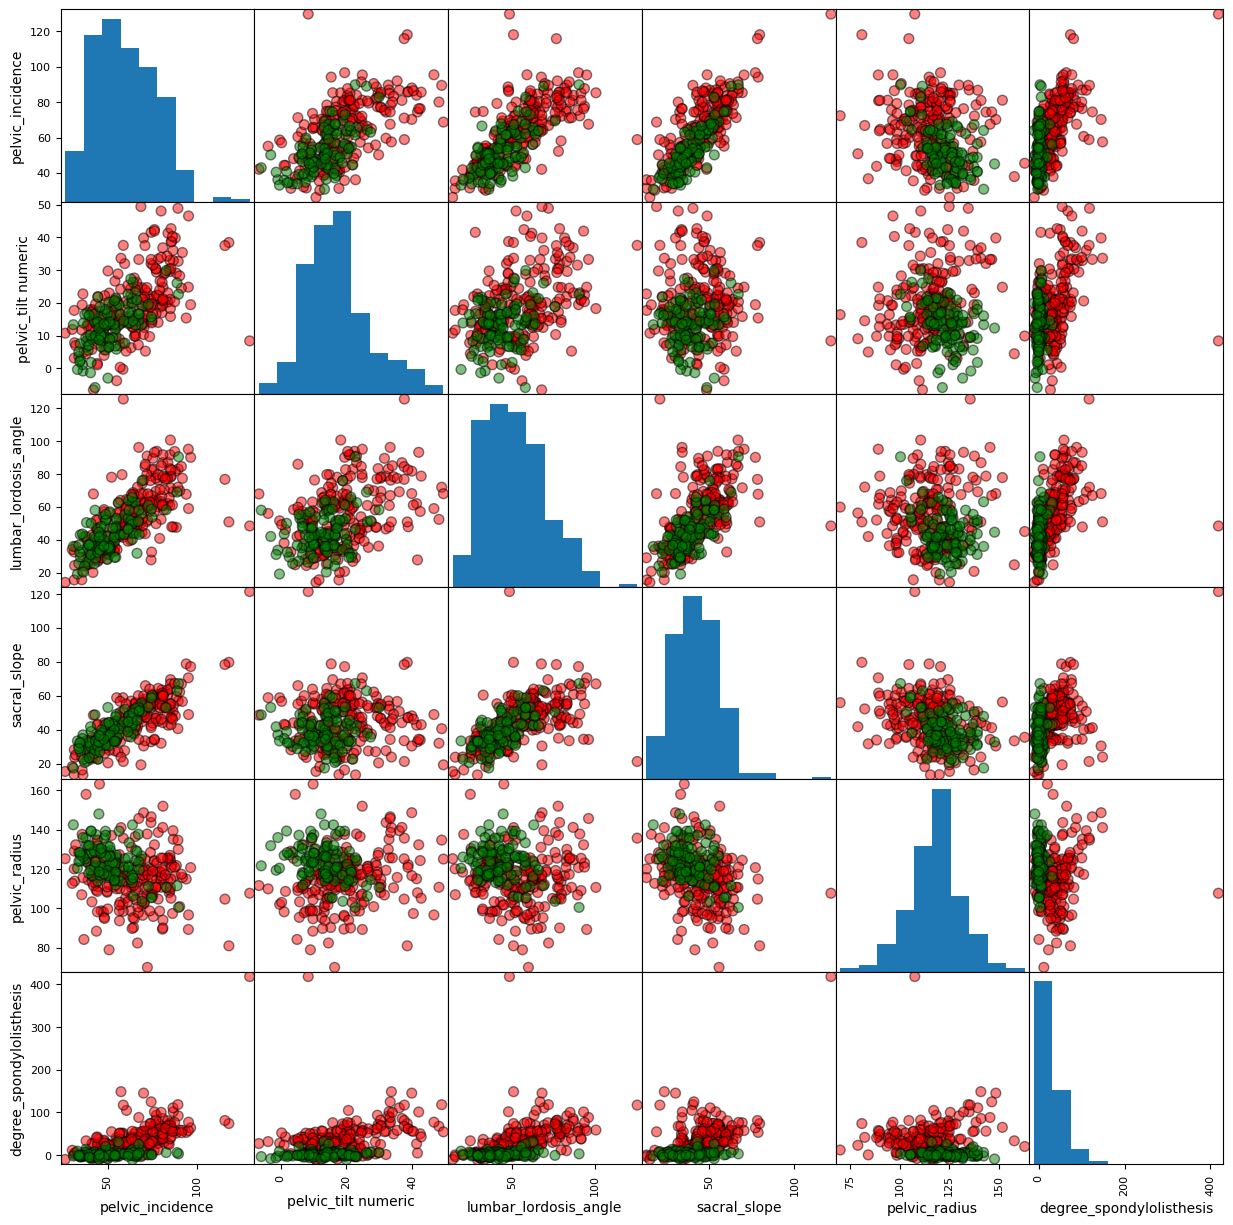

In [5]:
#plotting scatter matrix
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.savefig('ScatterMatrix')
plt.show()

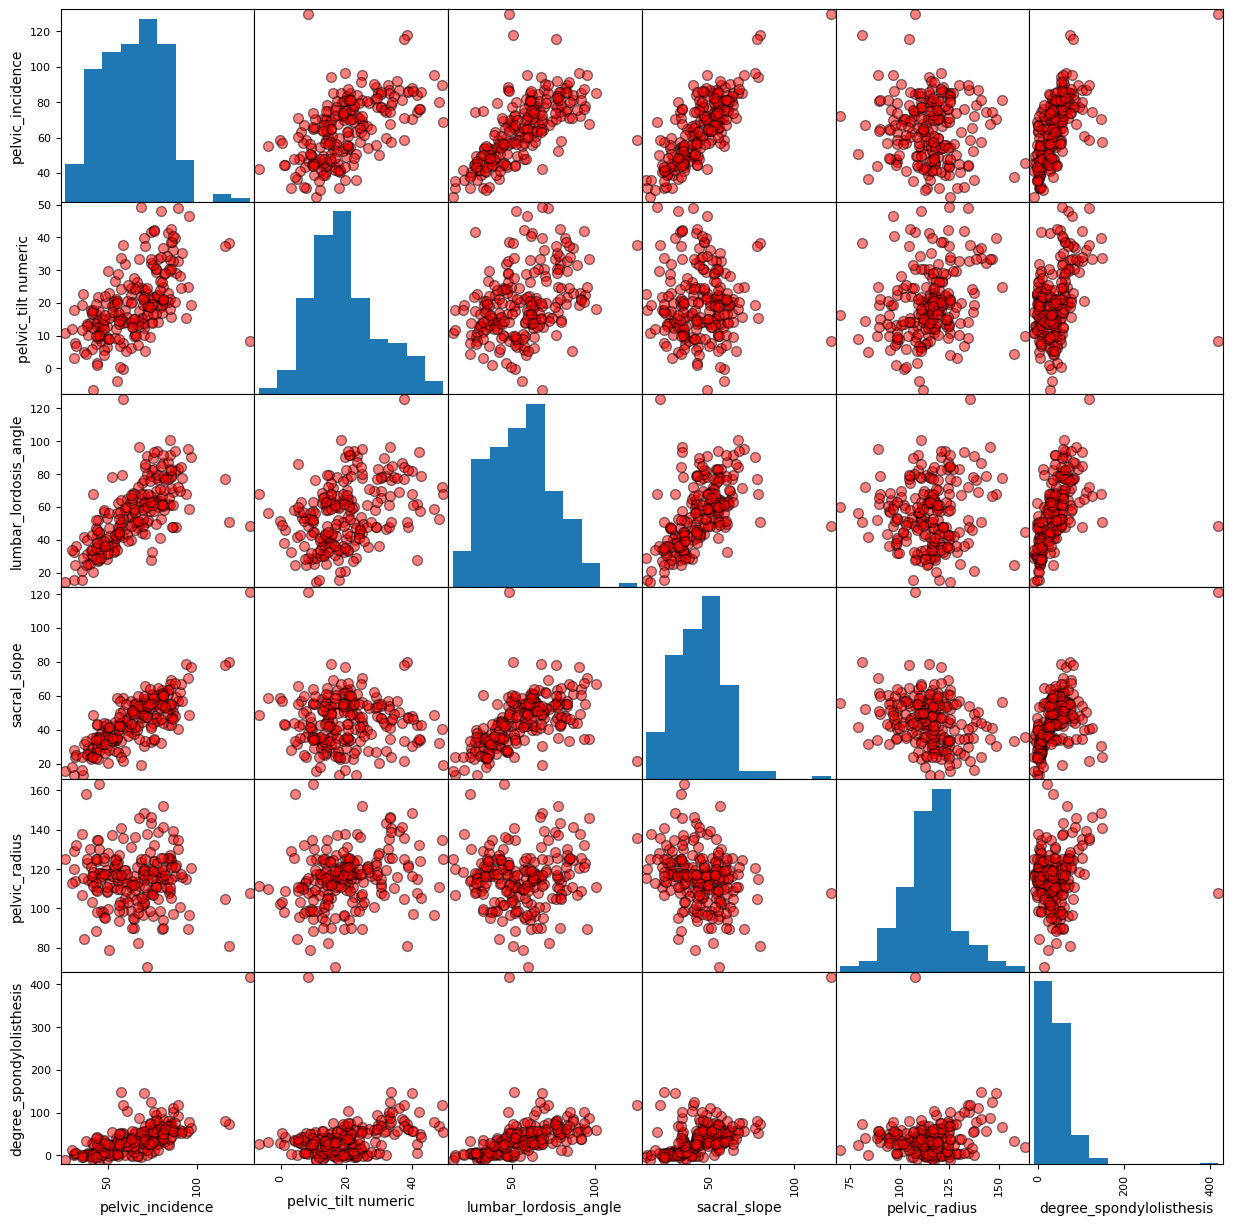

In [6]:
data_abnormal = data[data["class"]=="Abnormal"]
pd.plotting.scatter_matrix(data_abnormal.loc[:, data_abnormal.columns != "class"],
                                       c="red",
                                       figsize= [15,15],
                                       diagonal="hist",
                                       alpha=0.5,
                                       s = 200,
                                       marker = ".",
                                       edgecolor= "black")
plt.savefig('ScatterMatrixAbnormal')
plt.show()

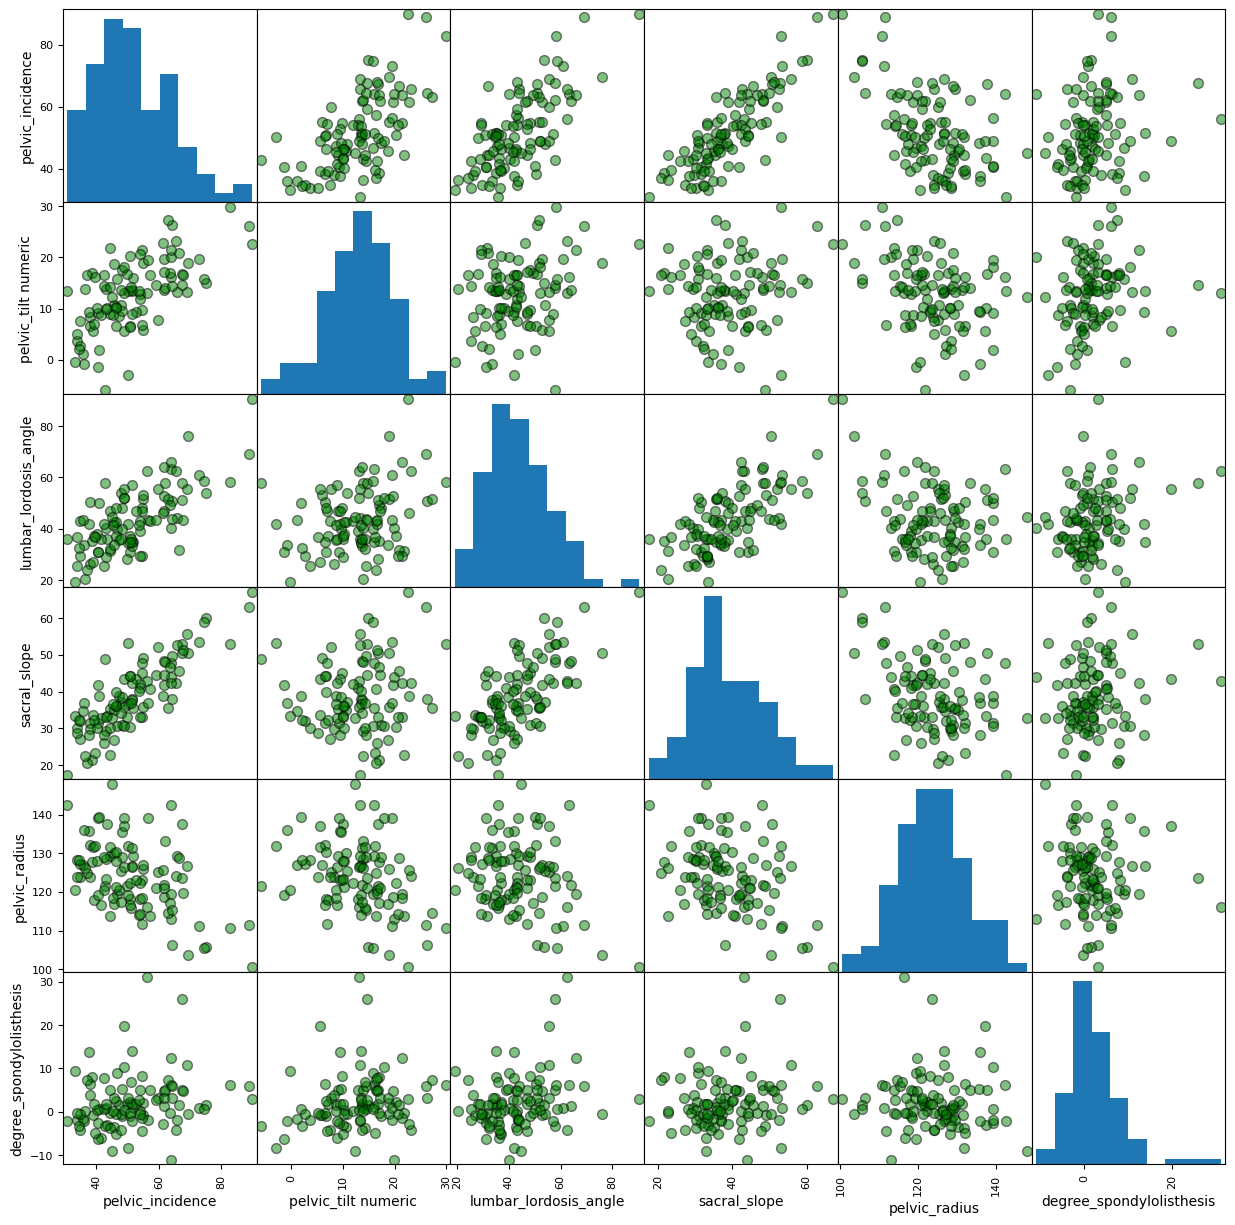

In [7]:
data_abnormal = data[data["class"]=="Normal"]
pd.plotting.scatter_matrix(data_abnormal.loc[:, data_abnormal.columns != "class"],
                                       c="green",
                                       figsize= [15,15],
                                       diagonal="hist",
                                       alpha=0.5,
                                       s = 200,
                                       marker = ".",
                                       edgecolor= "black")
plt.savefig('ScatterMatrixNormal')
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

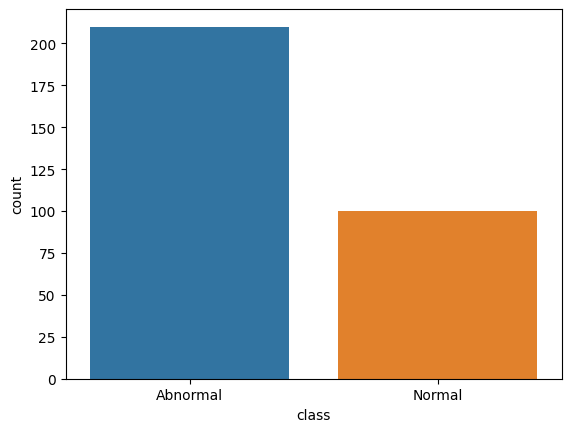

In [8]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

In [9]:
#finding correlation
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [10]:
#sorting correlations with ascending sort
data.corr().unstack().sort_values().drop_duplicates()

pelvic_radius             sacral_slope               -0.342128
pelvic_incidence          pelvic_radius              -0.247467
pelvic_radius             lumbar_lordosis_angle      -0.080344
                          degree_spondylolisthesis   -0.026065
pelvic_tilt numeric       pelvic_radius               0.032668
                          sacral_slope                0.062345
                          degree_spondylolisthesis    0.397862
lumbar_lordosis_angle     pelvic_tilt numeric         0.432764
sacral_slope              degree_spondylolisthesis    0.523557
lumbar_lordosis_angle     degree_spondylolisthesis    0.533667
                          sacral_slope                0.598387
pelvic_tilt numeric       pelvic_incidence            0.629199
degree_spondylolisthesis  pelvic_incidence            0.638743
lumbar_lordosis_angle     pelvic_incidence            0.717282
pelvic_incidence          sacral_slope                0.814960
                          pelvic_incidence            1

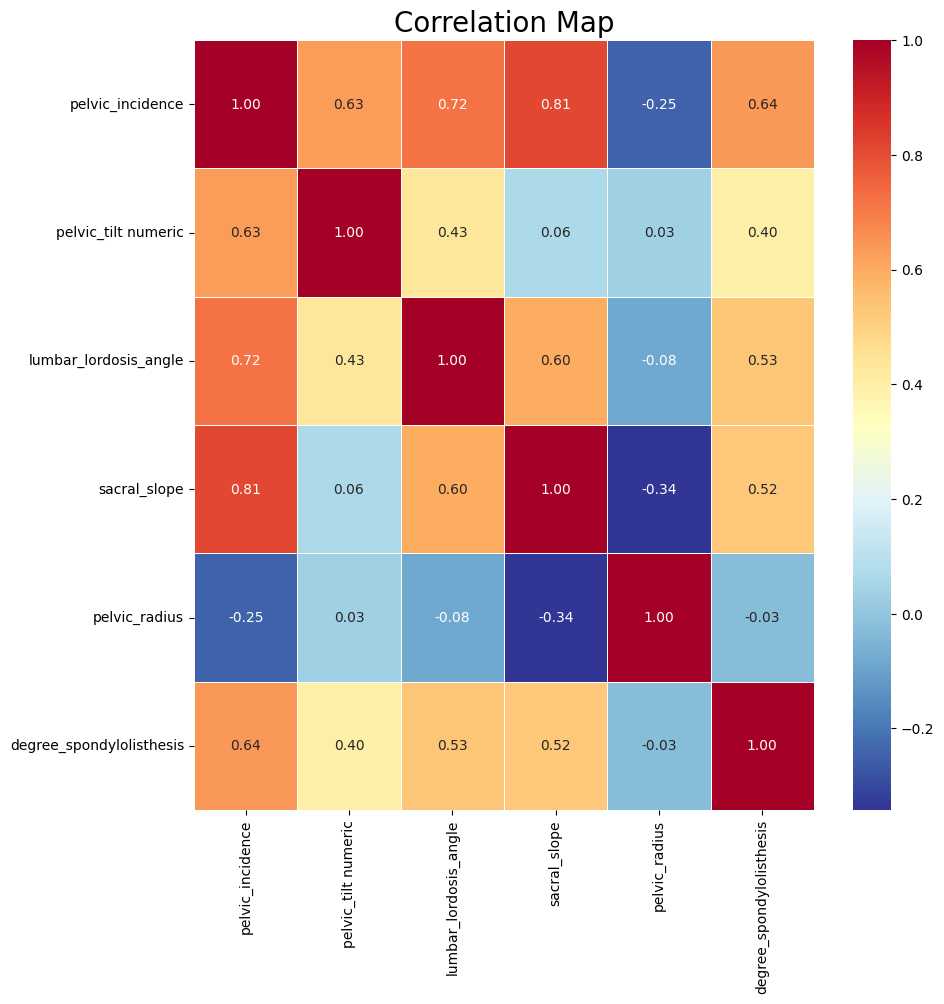

In [11]:
#correlation map
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidth=".5", cmap="RdYlBu_r", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.savefig('CorrelationHeatMap')
plt.show()

PreProcessing

In [12]:
#PreProcessing
from sklearn.preprocessing import LabelEncoder

In [13]:
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
encoder = LabelEncoder()
y1=encoder.fit_transform(y)

Implementation Method KNN

In [14]:
# train test split and using KNN
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 4)
#x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print(' When k=4 testing accuracy is: ',knn.score(x_test,y_test))

 When k=4 testing accuracy is:  0.8387096774193549


In [16]:
#model complexity or hyper parameter selection for k
neighbour = np.arange(1, 27)
train_accuracy = []
test_accuracy = []
# Looping over different values of k
for i, k in enumerate(neighbour):
    # k from 1 to 23(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

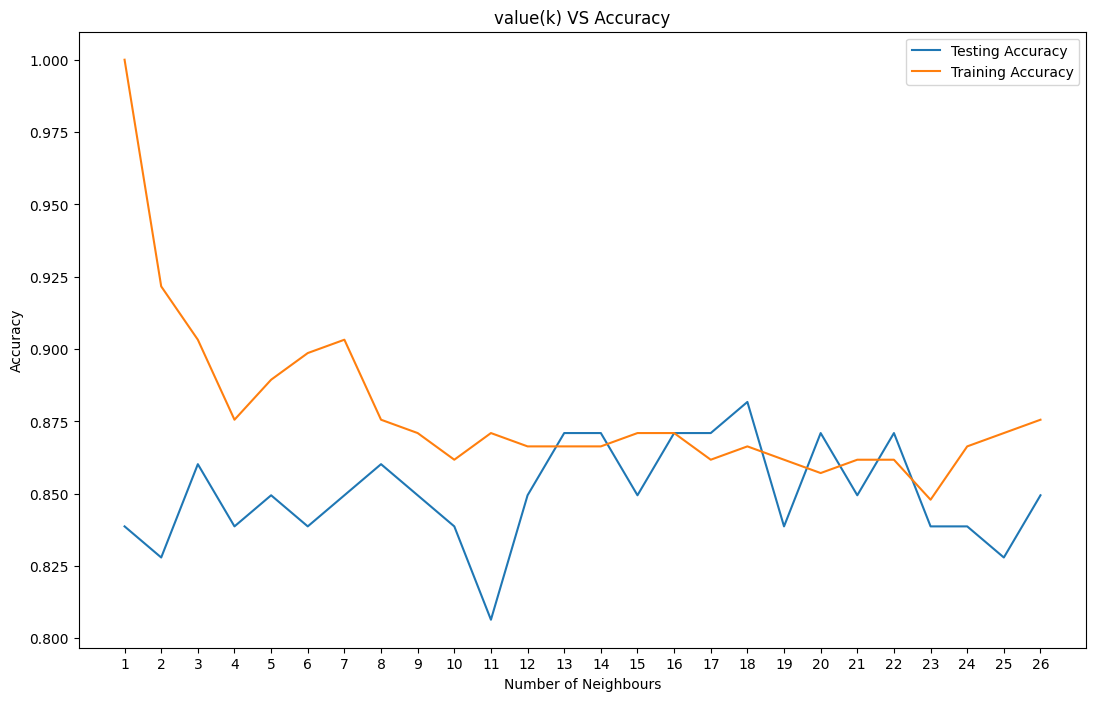

Best accuracy is 0.8817204301075269 with K = 18


In [17]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neighbour, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbour, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('value(k) VS Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.xticks(neighbour)
#plt.savefig('modelSelection.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Evaluation

In [18]:
#printing confusiom matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
cmat = confusion_matrix(y_test,prediction)
print('Confusion matrix: \n',cmat)
cr= classification_report(y_test,prediction)
print('Classification report: \n',cr)

Confusion matrix: 
 [[61  5]
 [10 17]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.86      0.92      0.89        66
      Normal       0.77      0.63      0.69        27

    accuracy                           0.84        93
   macro avg       0.82      0.78      0.79        93
weighted avg       0.83      0.84      0.83        93



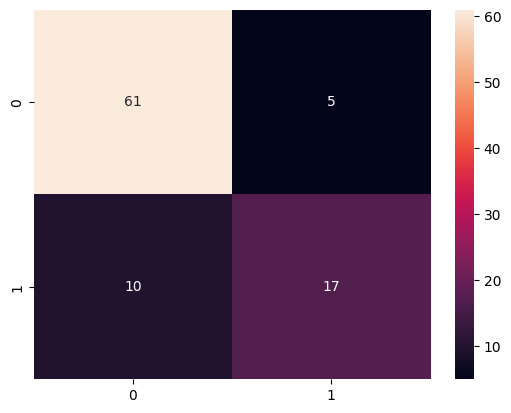

In [19]:
#visualizing confusion matrix
sns.heatmap(cmat,annot=True,fmt="d")
#plt.savefig('ConfusionMatrix')
plt.show()

In [20]:
#cross validation
from sklearn.model_selection import cross_val_score
reg = KNeighborsClassifier(10)
k = 10
cv_result = cross_val_score(reg,x,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.61290323 0.74193548 0.74193548 0.77419355 0.90322581 0.93548387
 0.93548387 0.96774194 0.83870968 0.90322581]
CV scores average:  0.835483870967742
